# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [17]:
df = pd.read_excel('./uw-supplier-data040423.xlsx')
df['County Under Drought Declaration'] = df['County Under Drought Declaration'].fillna('No')

In [18]:
df_graph = df[['Reporting Month', 'Supplier Name', 'County', 'County Under Drought Declaration', 'CALCULATED R-GPCD']]

In [19]:
df_graph = df_graph.groupby(['County', 'Reporting Month', 'County Under Drought Declaration']).sum().reset_index()
for county in df_graph['County'].unique():
    for date in df_graph['Reporting Month'].unique():
        if len(df_graph['County Under Drought Declaration'][(df_graph['County'] == county) & (df_graph['Reporting Month'] == date)]) > 1:
            df_graph.loc[(df_graph['County'] == county) & (df_graph['Reporting Month'] == date)] = county, date, 'Yes', df_graph['CALCULATED R-GPCD'][(df_graph['County'] == county) & (df_graph['Reporting Month'] == date)].sum()
            

# Plotting the graphs

C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anacond

C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anacond

C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayes\anacond

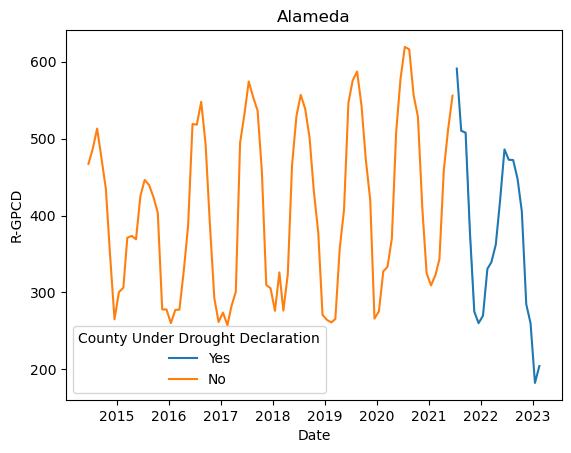

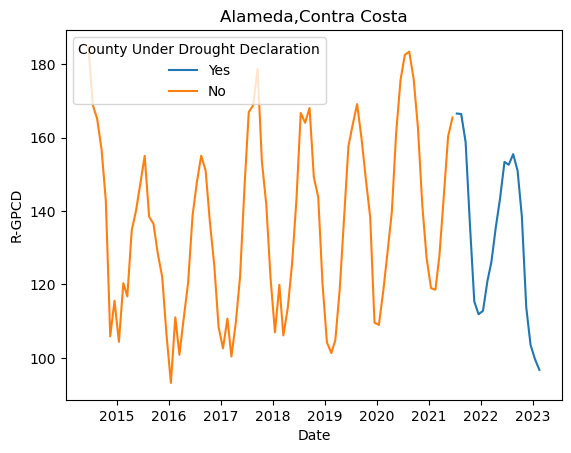

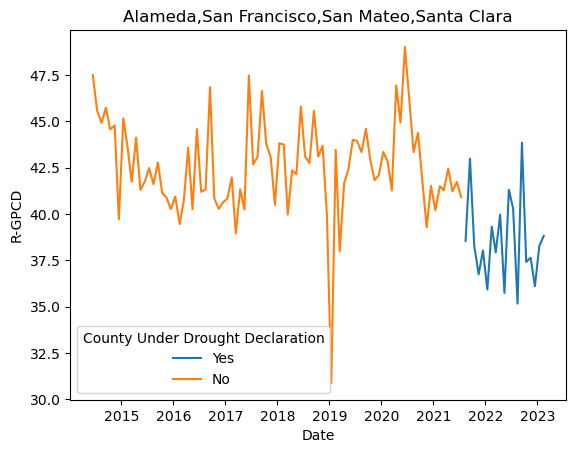

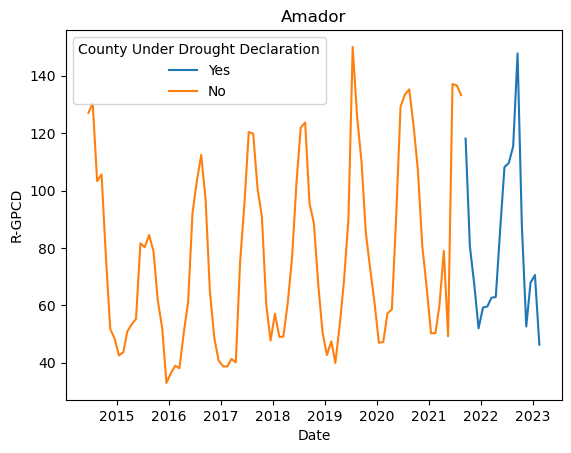

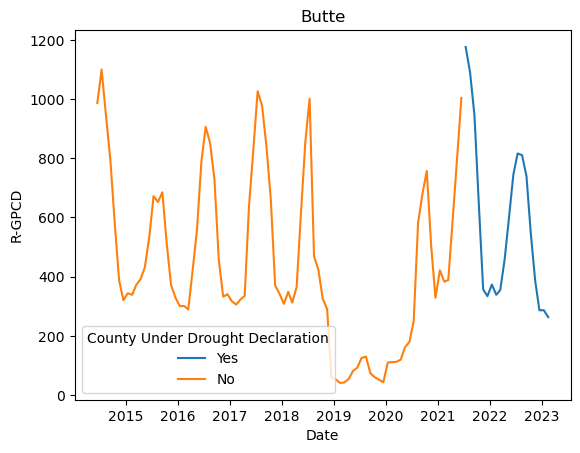

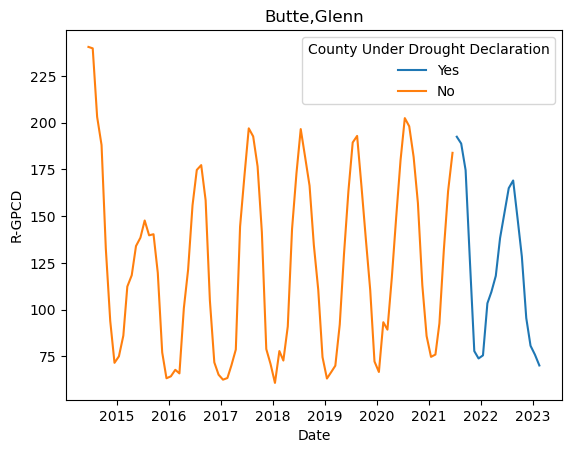

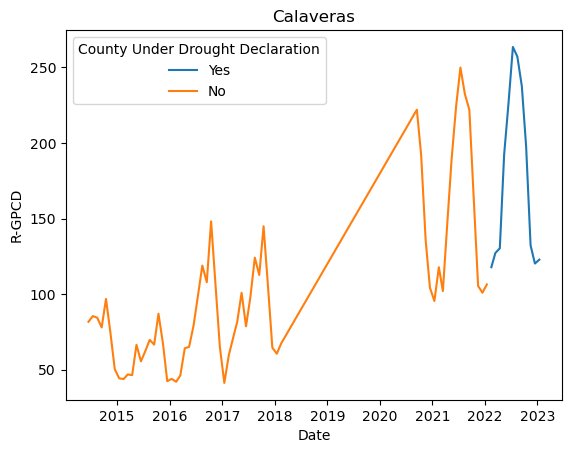

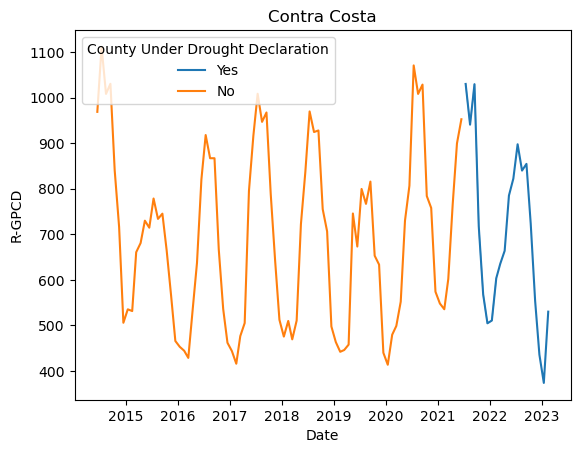

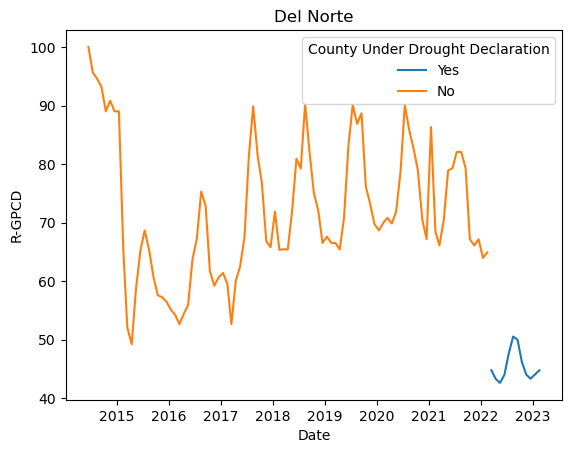

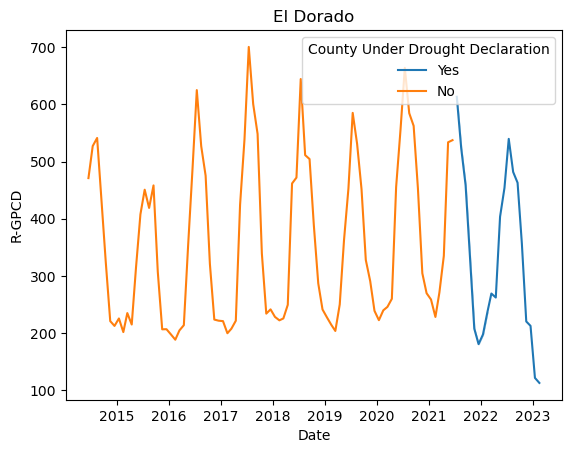

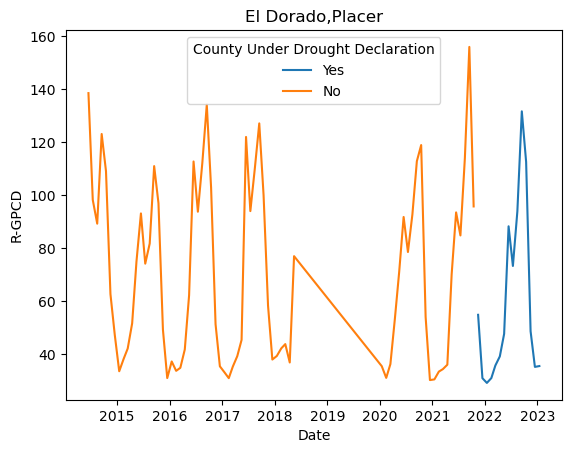

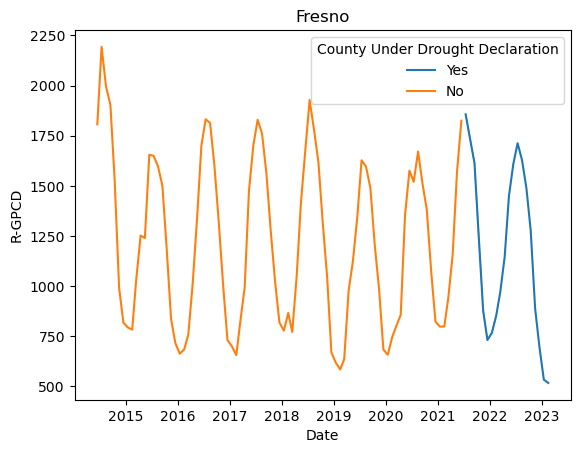

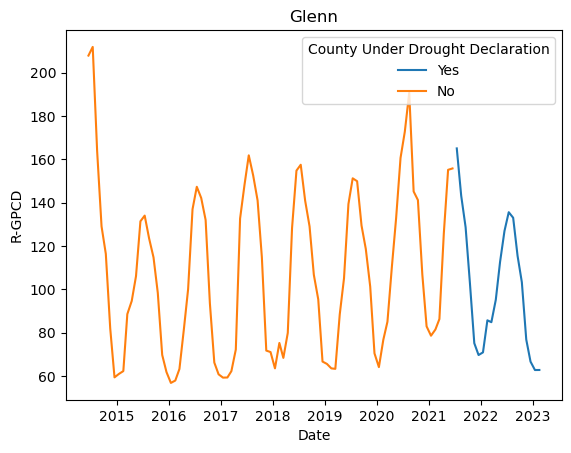

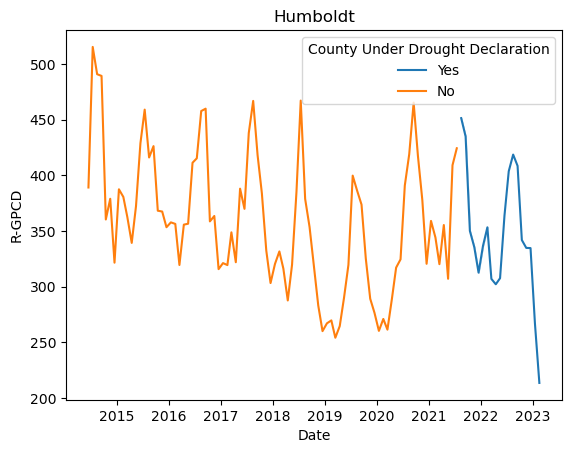

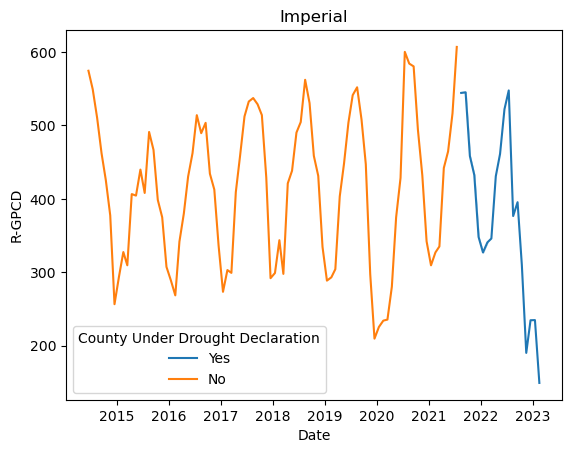

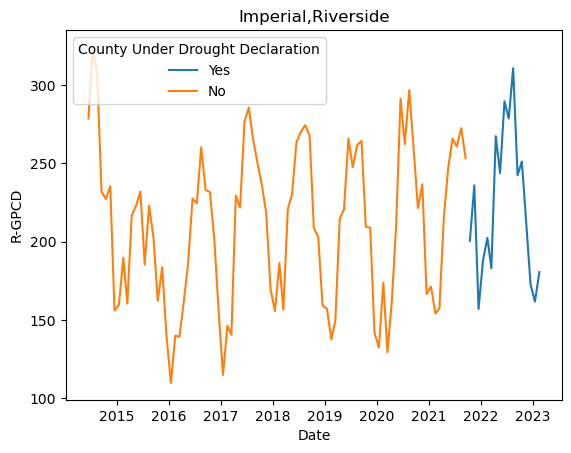

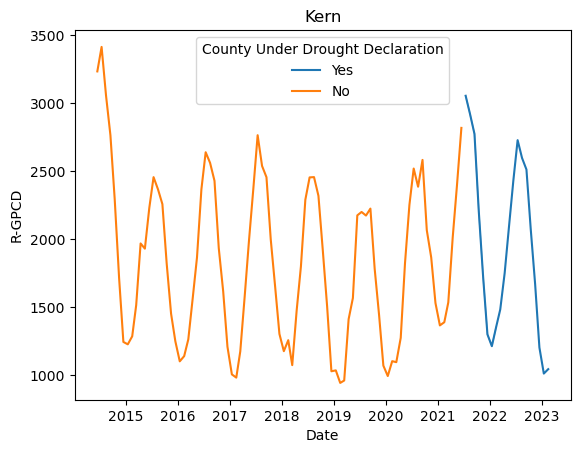

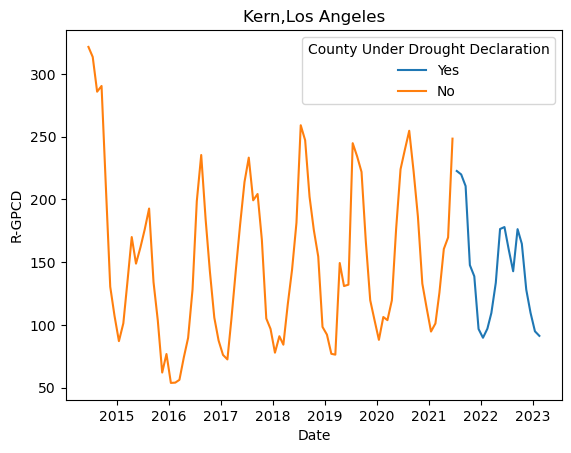

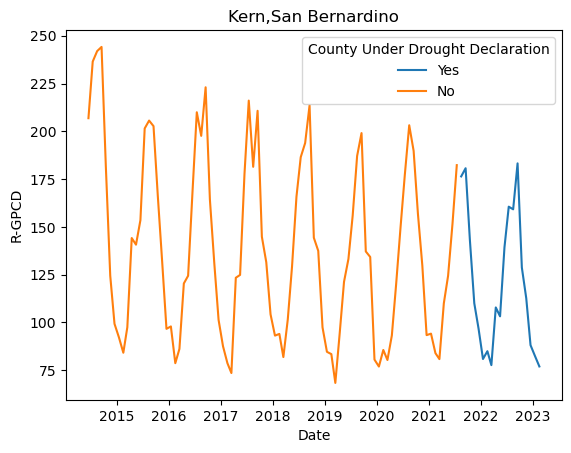

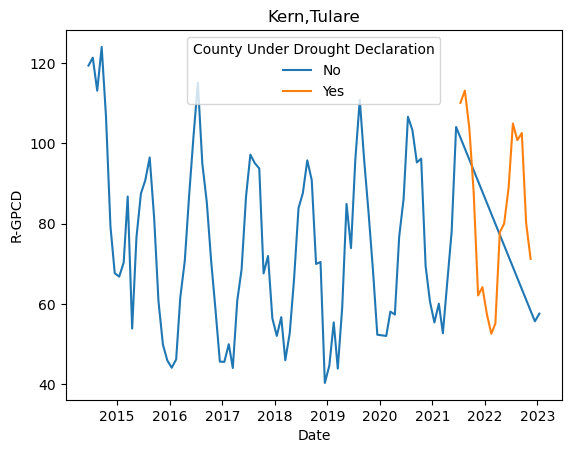

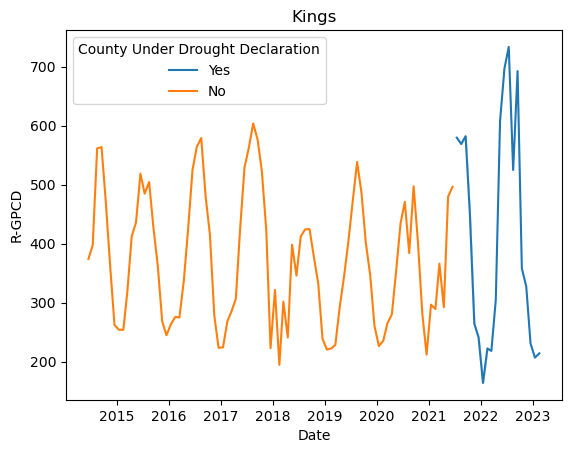

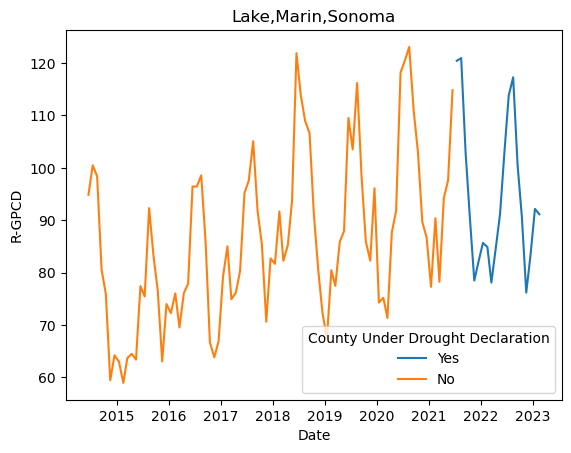

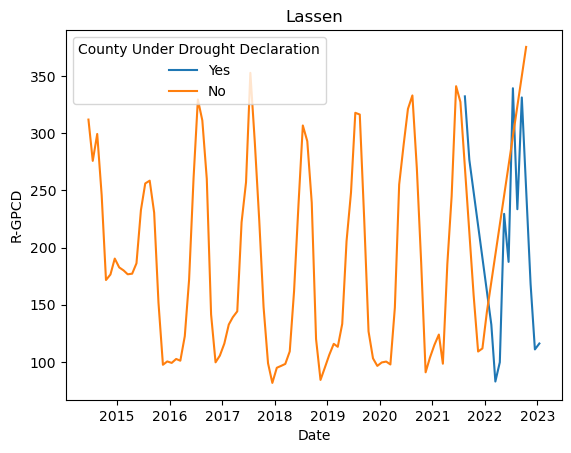

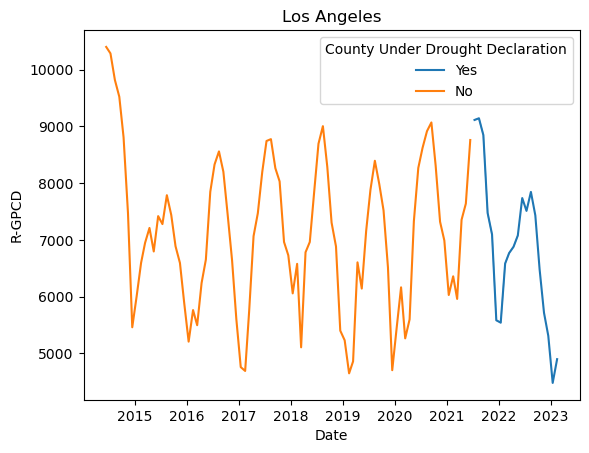

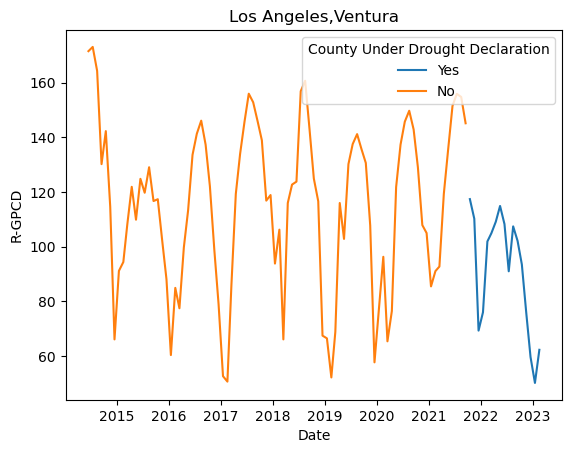

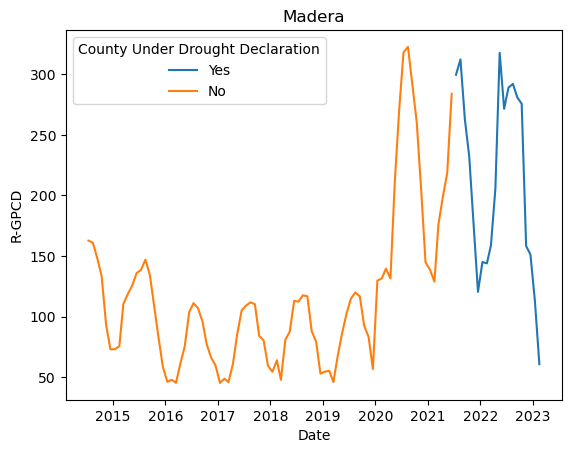

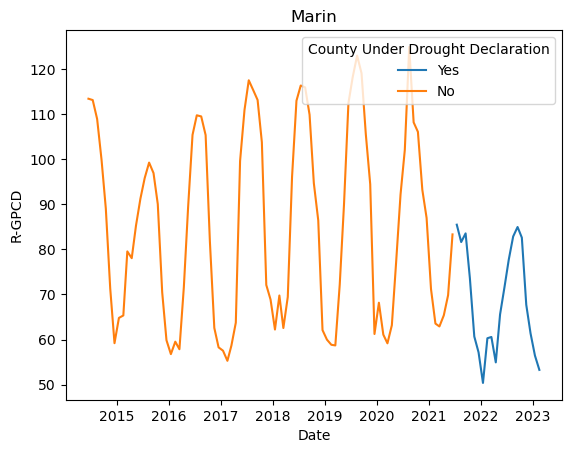

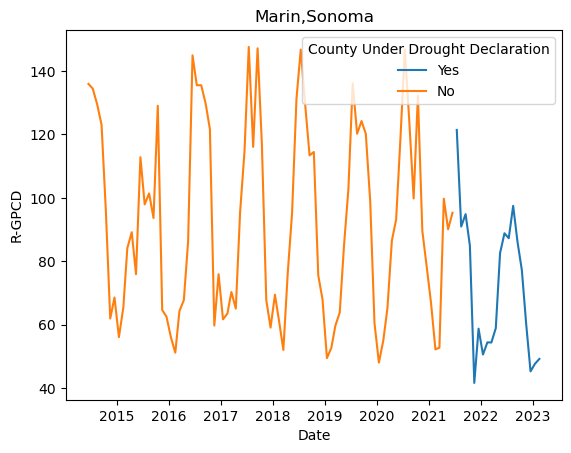

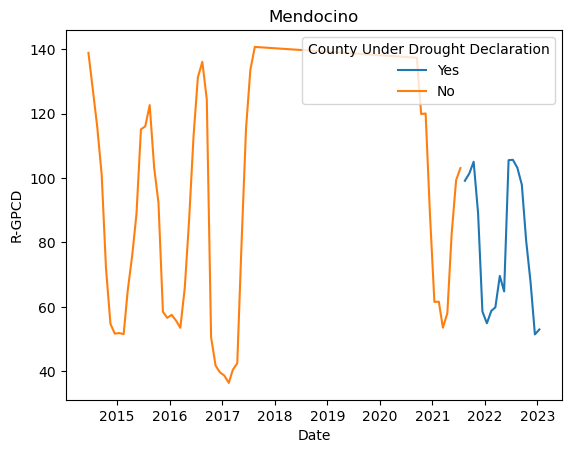

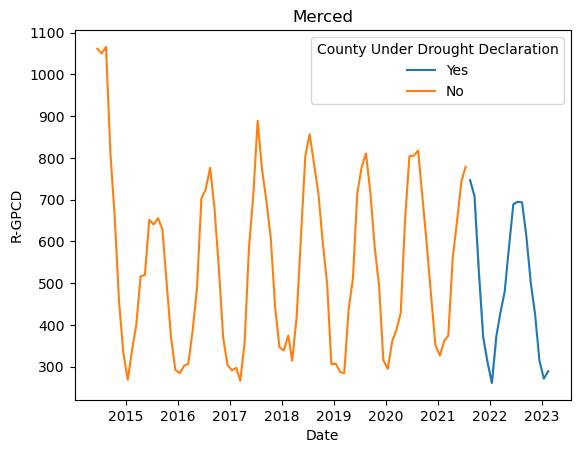

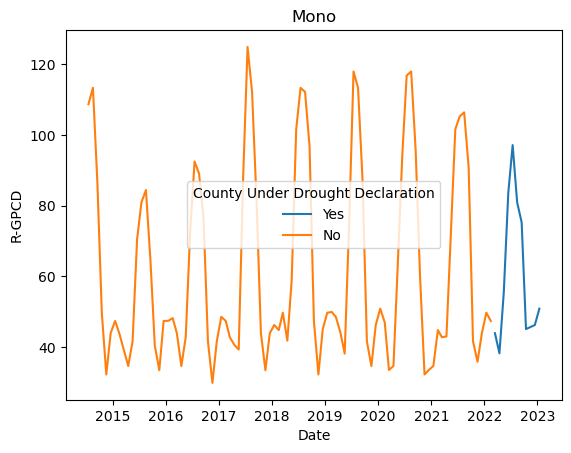

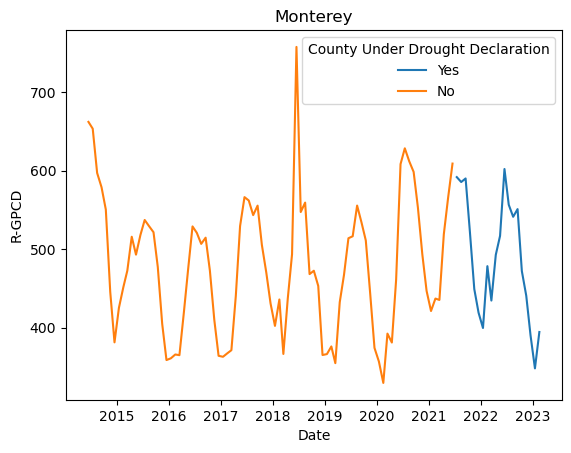

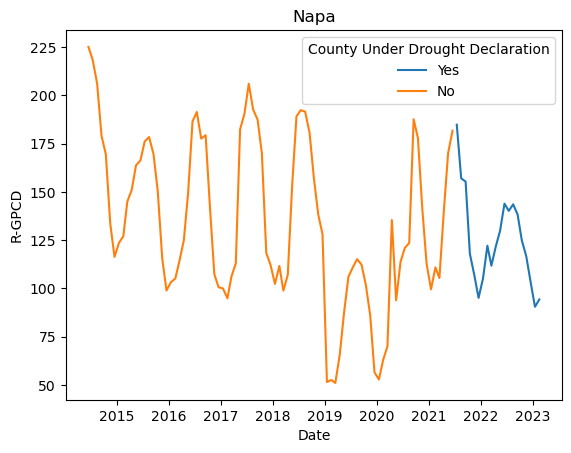

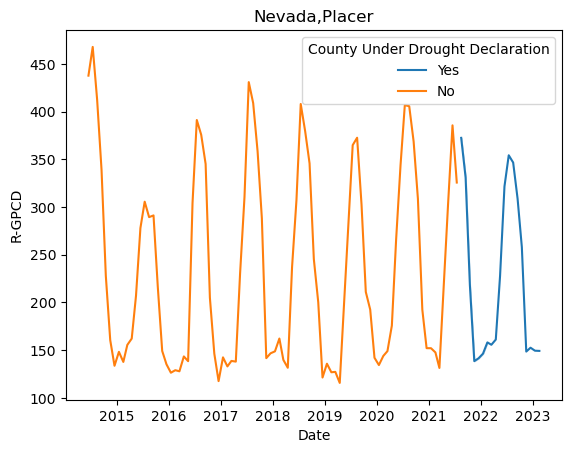

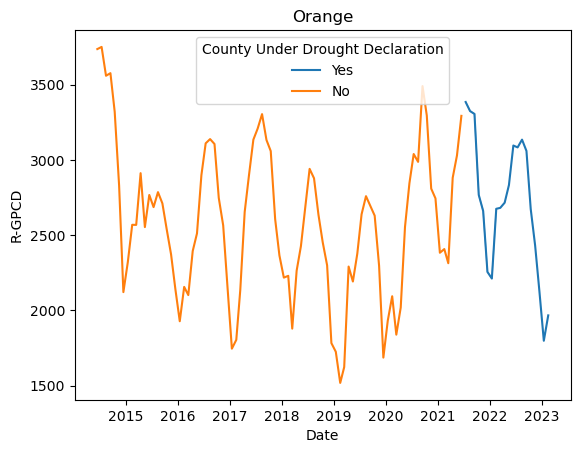

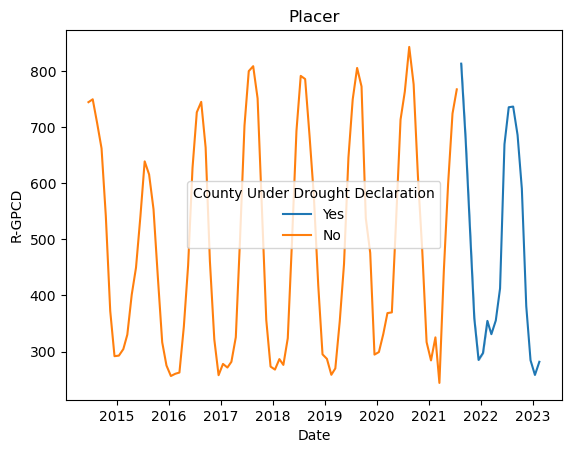

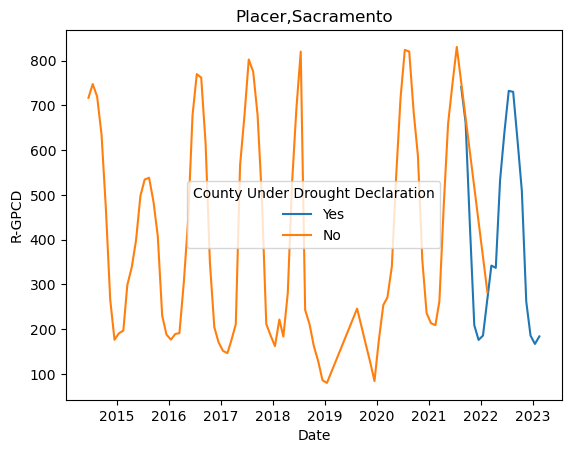

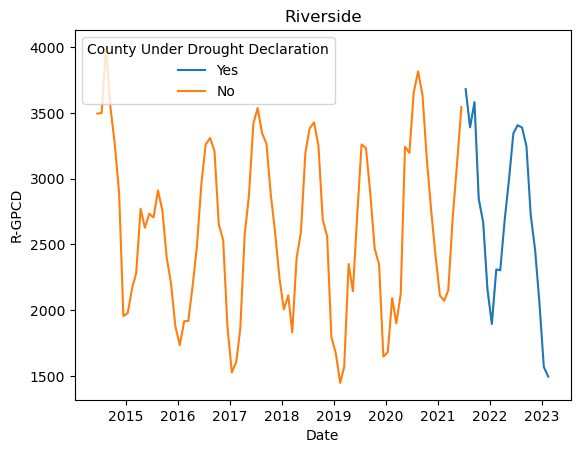

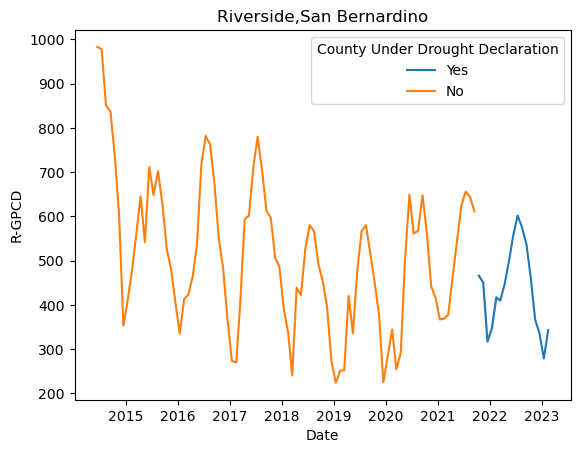

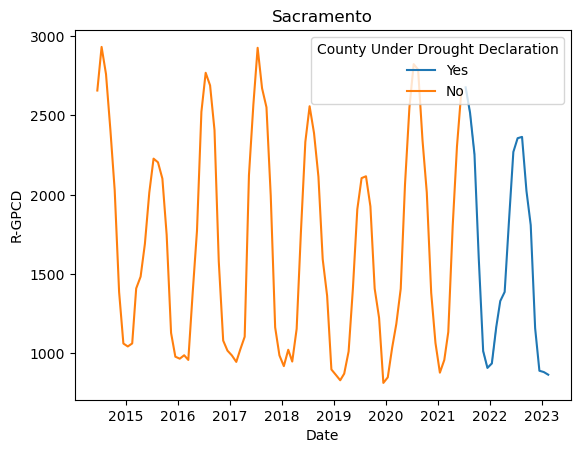

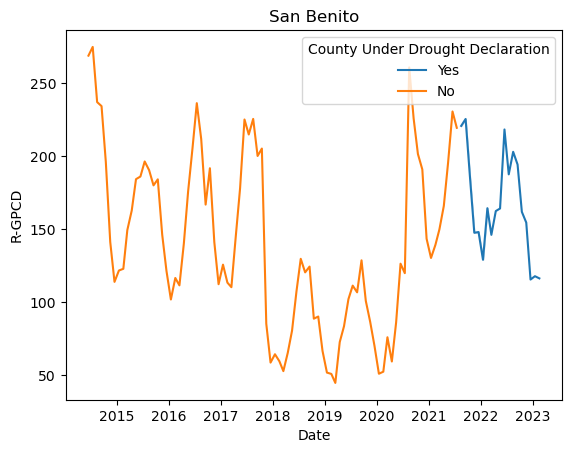

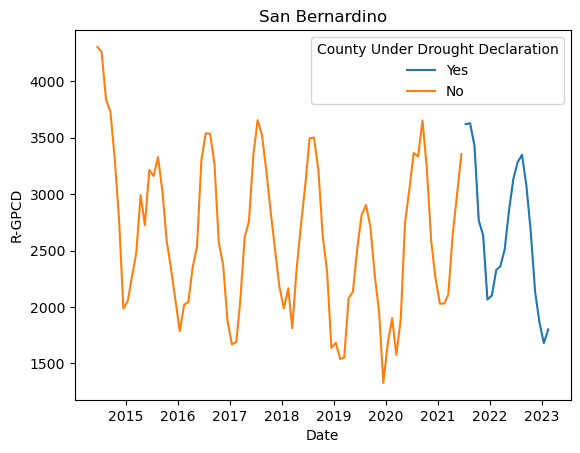

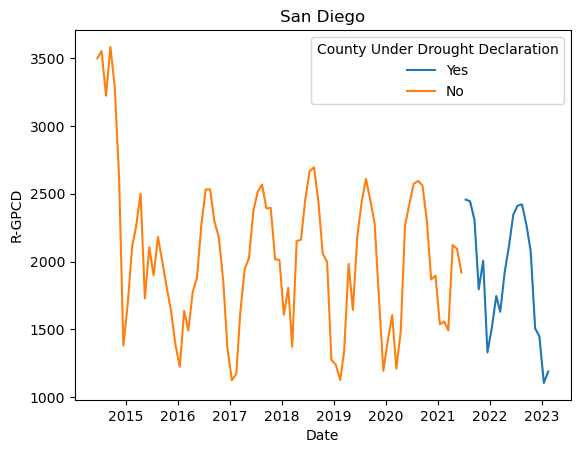

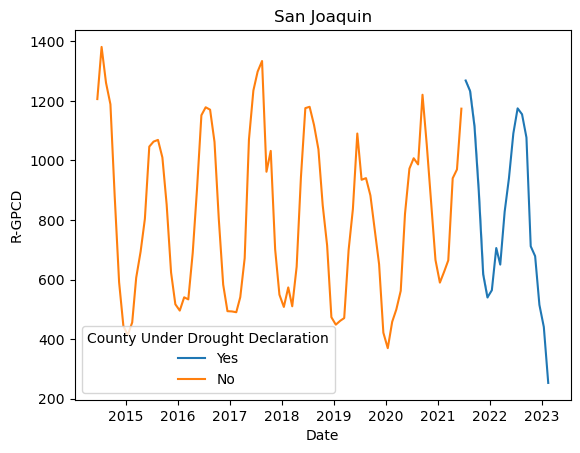

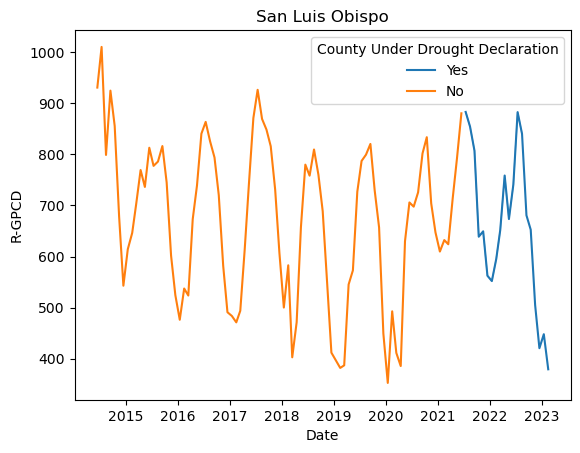

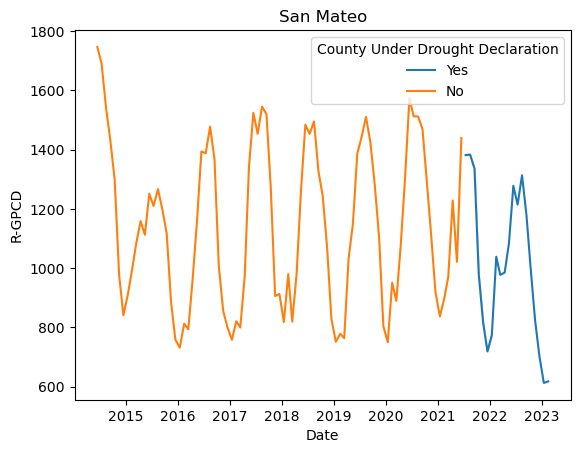

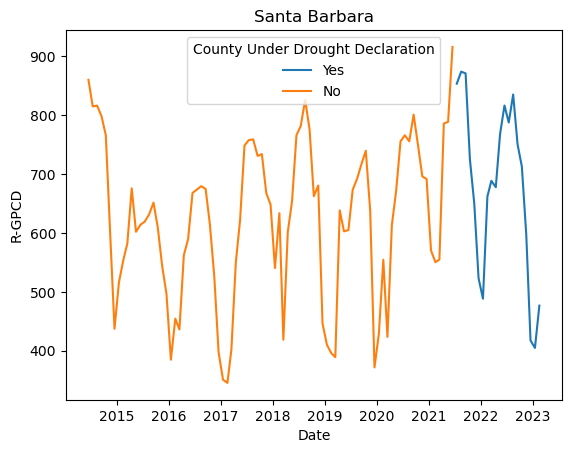

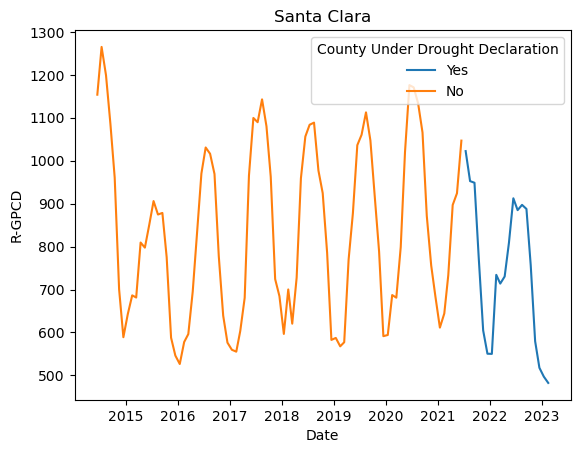

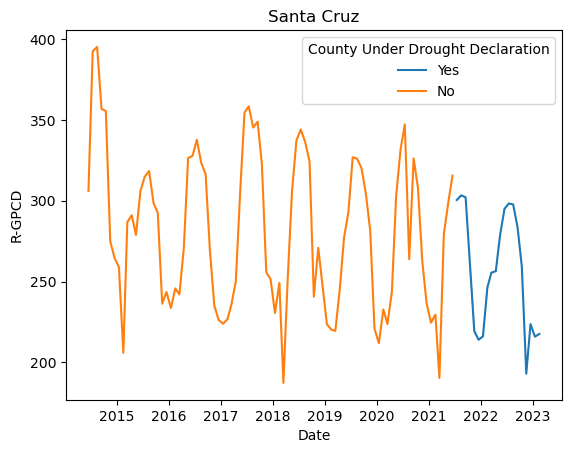

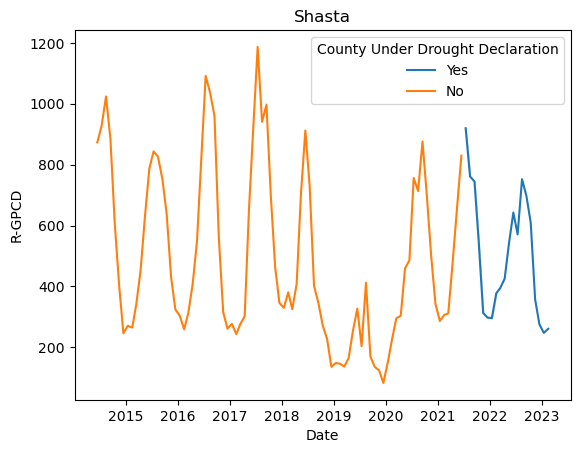

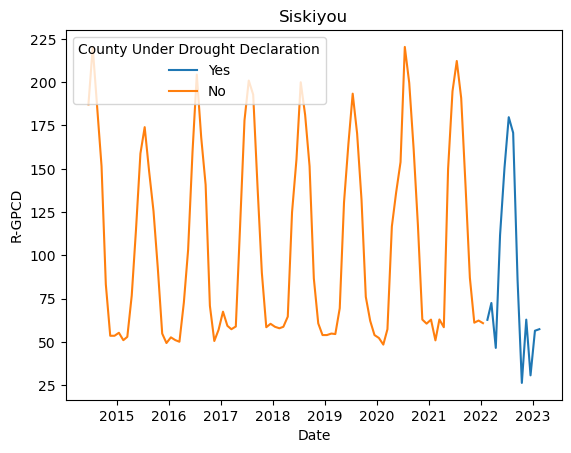

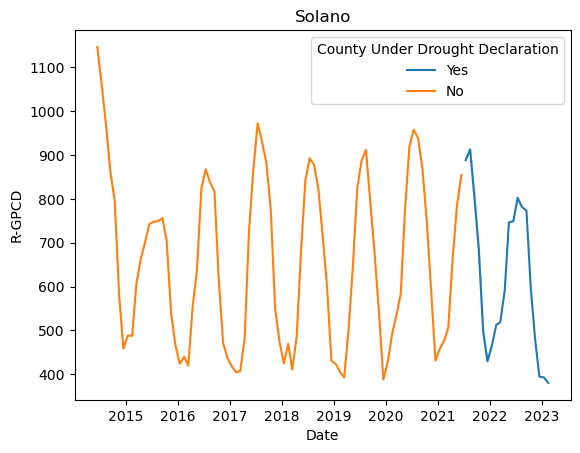

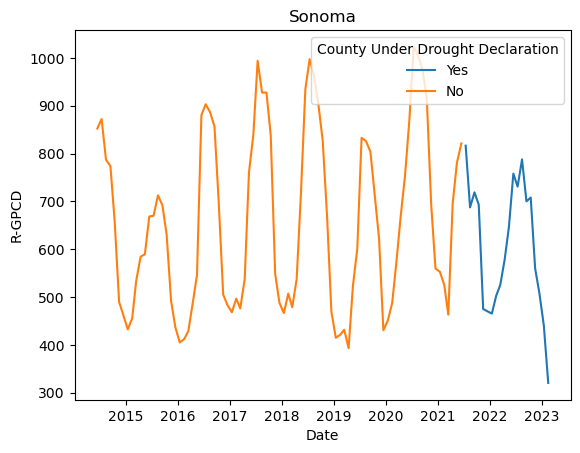

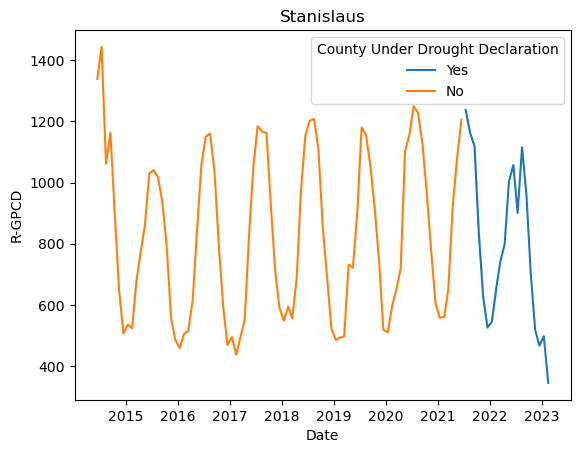

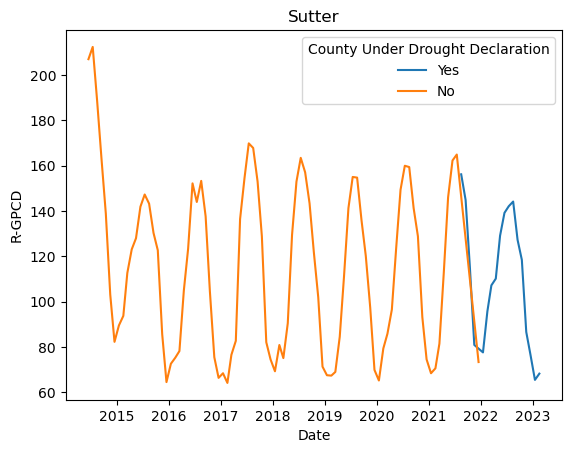

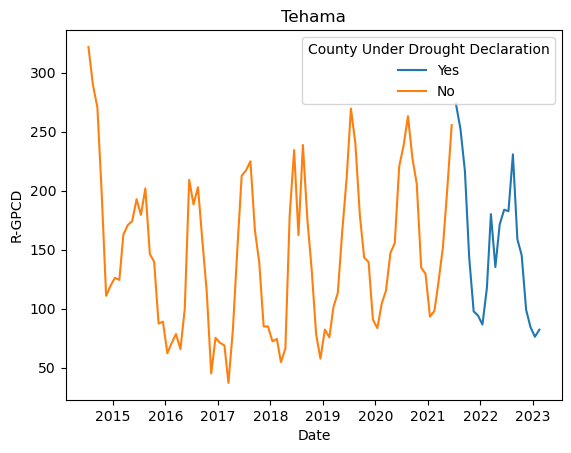

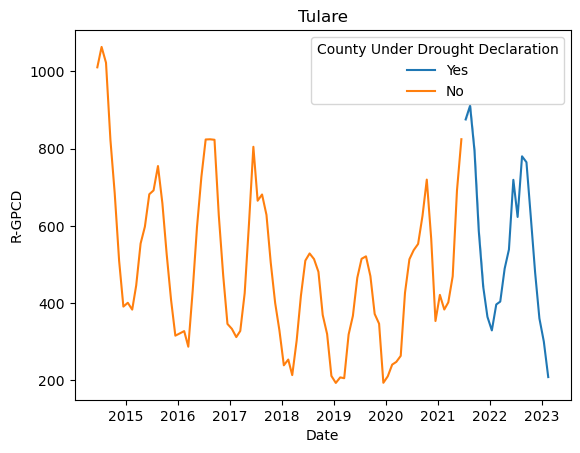

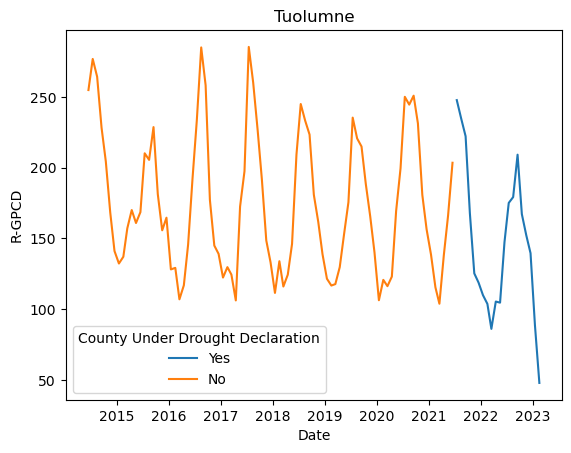

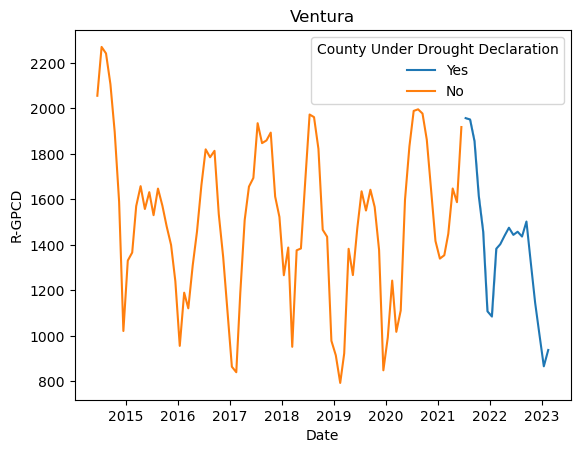

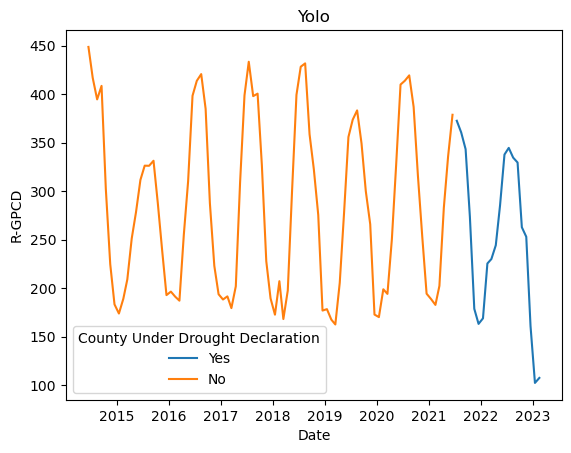

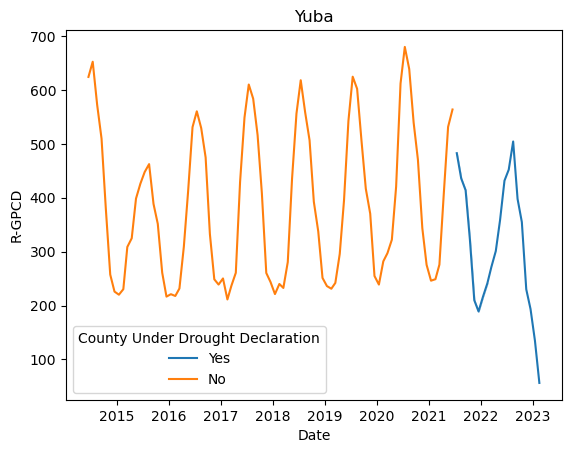

In [23]:
i = 1
for county in df_graph['County'].unique():
    x = []
    for date in df_graph['Reporting Month'][(df_graph['County'] == county)]:
        x += [date.date()]

    y = []
    for r_gdpc in df_graph['CALCULATED R-GPCD'][(df_graph['County'] == county)]:
        y += [r_gdpc]

    n = []    
    for drought in df_graph['County Under Drought Declaration'][(df_graph['County'] == county)]:
        n += [drought]

    x = x[::-1]
    y = y[::-1]
    n = n[::-1]

    plt.figure(i)
    i += 1
    sns.lineplot(x, y, hue=n)
    
    plt.title(county)
    plt.xlabel('Date')
    plt.ylabel('R-GPCD')
    plt.legend(title='County Under Drought Declaration')
plt.show()